In [1]:
#librarys
import matplotlib.pyplot as plt

In [2]:
#functions used by this script
%run ./ChiQuad.ipynb

# Name of the file to plot

In [3]:
#call chiquadfunc
values = data("SN2004eo_convertido.txt")

284.914007
<ValueView of Minuit at 395b060>
  t0: 282.98753569191774
  x0: 0.003205819999506254
  x1: -9.99999999999923e-06
  x2: -9.9999999999201e-06


## function returns

In [4]:
#chiquad over degree of freedom
chiquaddof = values[0]

In [5]:
print(chiquaddof)

5181.600719051298


In [6]:
#values fitted
fitvalues =  values[1]

In [7]:
fitvalues[0]

282.98753569191774

In [8]:
#non repeated bands
nonbands = values[2]

In [9]:
#template functions
tpfun = values[3]

In [10]:
#bands
bands = values[4]

In [11]:
#data time, flux and flux error
xx = values[5]
zz = values[6]
ezz = values[7]

# Plot data def function

In [12]:
#function that will return plot data according to band
def plot(band):

    x_gr = np.linspace(-10, 50, 60 + 1)
    
    #band index
    bandindex = [j for j, e in enumerate(nonbands) if e == band]
    
    #template list data plot
    x_plot = []
    z_plot = []
    for i in range(0,len(x_gr)):

        x_plot.append(x_gr[i])
        z_plot.append(fitvalues[1]*(tpfun[bandindex[0]][0](x_gr[i]) + fitvalues[2]*tpfun[bandindex[0]][1](x_gr[i]) + fitvalues[3]*tpfun[bandindex[0]][2](x_gr[i])))

    #real data lists plot
    x_plot_dat = []
    z_plot_dat = []
    z_error_plot_dat = []

    for i in range(0,len(xx)):

        if bands[i] == band:

            x_plot_dat.append(xx[i]-fitvalues[0])
            z_plot_dat.append(zz[i])
            z_error_plot_dat.append(ezz[i])
    
    #return template data points and real data plot points
    return x_plot, z_plot, x_plot_dat, z_plot_dat, z_error_plot_dat

# Choose a band to plot:

In [13]:
dataplotcspb = plot("cspb")
dataplotcspg = plot("cspg")
dataplotcspr = plot("cspr")
dataplotcspi = plot("cspi")

<IPython.core.display.Javascript object>


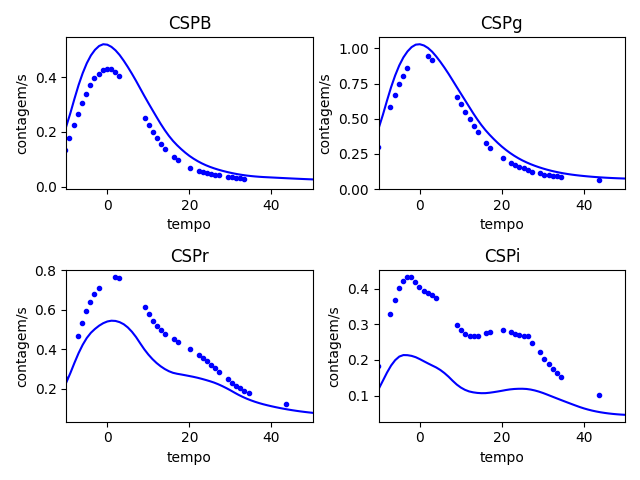

In [14]:
%matplotlib notebook

figure, axes = plt.subplots(nrows=2, ncols=2)

#figure.suptitle("Main Title \n dfas")

#plt.subplot(2, 1, 1)
axes[0, 0].set_title('CSPB')
axes[0, 0].plot(dataplotcspb[0], dataplotcspb[1], 'b')
axes[0, 0].errorbar(dataplotcspb[2], dataplotcspb[3], yerr=dataplotcspb[4], fmt='b.')
axes[0, 0].set_xlim([-10, 50])
axes[0, 0].set_xlabel("tempo")
axes[0, 0].set_ylabel("contagem/s")


#plt.subplot(2, 1, 2)
axes[0, 1].set_title('CSPg')
axes[0, 1].plot(dataplotcspg[0], dataplotcspg[1], 'b')
axes[0, 1].errorbar(dataplotcspg[2], dataplotcspg[3], yerr=dataplotcspg[4], fmt='b.')
axes[0, 1].set_xlim([-10, 50])
axes[0, 1].set_xlabel("tempo")
axes[0, 1].set_ylabel("contagem/s")

axes[1, 0].set_title('CSPr')
axes[1, 0].plot(dataplotcspr[0], dataplotcspr[1], 'b')
axes[1, 0].errorbar(dataplotcspr[2], dataplotcspr[3], yerr=dataplotcspr[4], fmt='b.')
axes[1, 0].set_xlim([-10, 50])
axes[1, 0].set_xlabel("tempo")
axes[1, 0].set_ylabel("contagem/s")

axes[1, 1].set_title('CSPi')
axes[1, 1].plot(dataplotcspi[0], dataplotcspi[1], 'b')
axes[1, 1].errorbar(dataplotcspi[2], dataplotcspi[3], yerr=dataplotcspi[4], fmt='b.')
axes[1, 1].set_xlim([-10, 50])
axes[1, 1].set_xlabel("tempo")
axes[1, 1].set_ylabel("contagem/s")

plt.tight_layout()


plt.show()

In [15]:
dataplotcspi

([-10.0,
  -9.0,
  -8.0,
  -7.0,
  -6.0,
  -5.0,
  -4.0,
  -3.0,
  -2.0,
  -1.0,
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0],
 [0.1189528650721818,
  0.14150938719635758,
  0.16426468444884254,
  0.18411325748378035,
  0.19928708553470276,
  0.20930240942441106,
  0.21350203551676894,
  0.21315611784201807,
  0.21119158532396345,
  0.20752797463656447,
  0.20211431513637249,
  0.19602967760004686,
  0.19008096075154204,
  0.18433196034505248,
  0.17868554014423207,
  0.1716583720430776,
  0.16300168450259625,
  0.15287929350336615,
  0.141413660420029,
  0.1308148817575925,
  0.12237939411565653,
  0.11597640066087542,
  0.111547236165771